In [123]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from sympy import init_printing, symbols, Matrix

In [126]:
init_printing(use_unicode=True)

### Problem 9.4 p.9-29

In [127]:
# Define the function
def f(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4)

In [128]:
# Define the gradient

def d_f_1(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (2*x1 -1)
    
def d_f_2(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (4*x2)

def d_f(x1, x2):
    return np.array([d_f_1(x1, x2), d_f_2(x1, x2)]).reshape(2, 1)

In [129]:
# Define the hessian

def d2_f_11(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (4*(x1**2) - 4*x1 + 3)

def d2_f_22(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (16*(x2**2) + 4)

def d2_f_21(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * ((2*x1 - 1) * 4*x2)

def d2_f_12(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * ((2*x1 - 1) * 4*x2)

def d2_f(x1, x2):
    return np.array([d2_f_11(x1, x2), d2_f_12(x1, x2), d2_f_21(x1, x2), d2_f_22(x1, x2)]).reshape(2, 2)

In [130]:
# Define the initale point
x = [np.array([1, -2]).reshape(2, 1)]

In [131]:
# Calculate the next point
for i in range(15):
    x.append(x[i] - np.matmul(linalg.inv(d2_f(x[i][0][0], x[i][1][0])), d_f(x[i][0][0], x[i][1][0])))

Text(0.5, 1.0, "Newton's method for optimization")

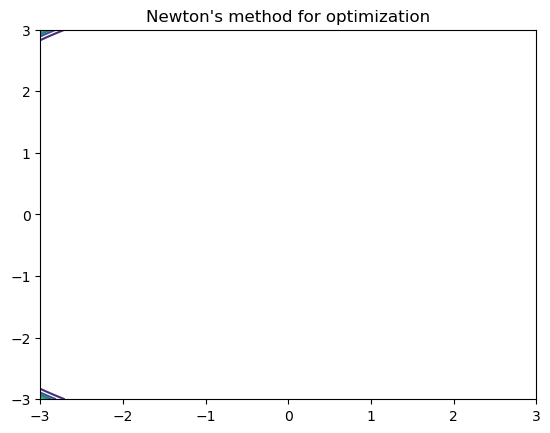

In [132]:
# Plot the function with the approximations

X = np.linspace(-3, 3, 1000)
Y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_title('Newton\'s method for optimization')

### Problem 9.5 p.9-31 

In [133]:
# Define the variables
x1, x2 = symbols('x_1 x_2')
x = Matrix([x1, x2])
al = 0.1

A = Matrix([[1, -1], [-1, 1]])

f = 1/2 * x.dot(A * x) 

In [134]:
df = Matrix([f.diff(i) for i in x])
d2f = Matrix([f.diff(i).diff(j) for j in x for i in x]).reshape(2, 2)

In [135]:
# Create function to calculate gradient at given x
def dfx(x1_, x2_):
    return df.subs([(x1, x1_), (x2, x2_)])

In [136]:
# Solve using Newtons method 
u = [(1, 0)]
# As A is not invertible, a stationary point 
# for the function does not exist
# u.append(u[0] - d2f**-1 * dfx(*u[0]))

In [144]:
# Solve using gradient descent
# Using alpha = 0.1
u = [Matrix([1, 0])]
for i in range(20):
    u.append(u[i] - al * dfx(u[i][0], u[i][1]))

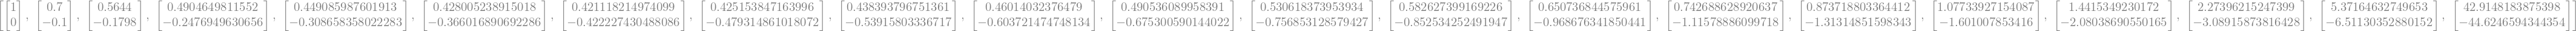

In [145]:
u

### Problem 9.6 p.9-32

In [173]:
# Define the variables
x1, x2 = symbols('x_1 x_2')
x = Matrix([x1, x2])

f = x1**3 + x1*x2 - (x1**2)*(x2**2)

In [174]:
df = Matrix([f.diff(i) for i in x])
d2f = Matrix([f.diff(i).diff(j) for j in x for i in x]).reshape(2, 2)

In [175]:
def fx(x1_, x2_):
    return f.subs([(x1, x1_), (x2, x2_)])
def dfx(x1_, x2_):
    return df.subs([(x1, x1_), (x2, x2_)])

def d2fx(x1_, x2_):
    return d2f.subs([(x1, x1_), (x2, x2_)])

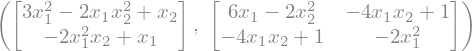

In [176]:
df, d2f

In [177]:
u = [Matrix([1, 1])]

u.append(u[0] - d2fx(*u[0])**-1 * dfx(*u[0]))

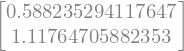

In [178]:
u[1].evalf()

In [182]:
dx = Matrix([x1, x2]) - u[0]
f2 = fx(*u[0]) + dfx(*u[0]).dot(dx) + 1/2 * dx.dot(d2fx(*u[0]) * dx)

In [183]:
f2